# Eigenvalues and Eigenvectors: Analysis and Applications

An exploration of eigenvalues and eigenvectors through linear transformations and their application to web page navigation modeling.

# Table of Contents
- [ 1 - Eigenvalues and Eigenvectors: Definition and Interpretation](#1)
  - [ 1.1 - Definition of Eigenvalues and Eigenvectors](#1.1)
  - [ 1.2 - Finding Eigenvalues and Eigenvectors with Python](#1.2)
- [ 2 - Eigenvalues and Eigenvectors of the Standard Transformations in a Plane](#2)
  - [ 2.1 - Reflection about y-axis (the vertical axis)](#2.1)
  - [ 2.2 - Shear in x-direction](#2.2)
  - [ 2.3 - Rotation](#2.3)
  - [ 2.4 - Identity Matrix and Scaling in All Directions](#2.4)
  - [ 2.5 - Projection onto x-axis](#2.5)
- [ 3 - Application of Eigenvalues and Eigenvectors: Navigating Webpages](#3)

## Packages

In [66]:
import numpy as np
import matplotlib.pyplot as plt

<a name='1'></a>
## 1 - Eigenvalues and Eigenvectors: Definition and Interpretation

<a name='1.1'></a>
### 1.1 - Definition of Eigenvalues and Eigenvectors

Let's consider a linear transformation defined by matrix $A=\begin{bmatrix}2 & 3 \\ 2 & 1 \end{bmatrix}$. Apply this transformation to the standard basis vectors $e_1=\begin{bmatrix}1 \\ 0\end{bmatrix}$ and $e_2=\begin{bmatrix}0 \\ 1\end{bmatrix}$ and visualize the result.

In [67]:
A = np.array([[2, 3],[2, 1]])
e1 = np.array([[1],[0]])
e2 = np.array([[0],[1]])

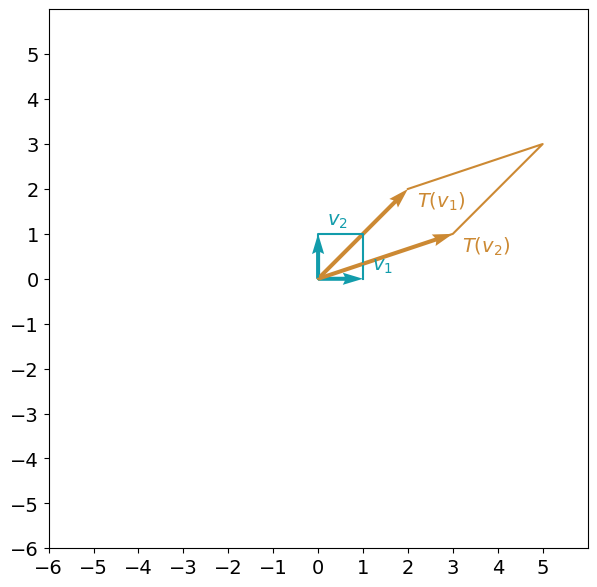

In [68]:
def plot_transformation(T,v1,v2):
    color_original = "#129cab"
    color_transformed = "#cc8933"
    
    # Ensure v1 and v2 are column vectors (2D arrays)
    if v1.ndim == 1:
        v1 = v1.reshape(-1, 1)
    if v2.ndim == 1:
        v2 = v2.reshape(-1, 1)
    
    _, ax = plt.subplots(figsize=(7, 7))
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xticks(np.arange(-6, 6))
    ax.set_yticks(np.arange(-6, 6))
    
    plt.axis([-6, 6, -6, 6])
    plt.quiver([0, 0],[0, 0], [v1[0,0], v2[0,0]], [v1[1,0], v2[1,0]], color=color_original, angles='xy', scale_units='xy', scale=1)
    plt.plot([0,v2[0,0],v1[0,0]+v2[0,0],v1[0,0]], 
        [0,v2[1,0],v1[1,0]+v2[1,0],v1[1,0]], 
        color=color_original)
    v1_sgn = 0.4 * np.array([[1 if v1[i,0]==0 else np.sign(v1[i,0])] for i in range(len(v1))])
    ax.text(v1[0,0]-0.2+v1_sgn[0,0], v1[1,0]-0.2+v1_sgn[1,0], f'$v_1$', fontsize=14, color=color_original)
    v2_sgn = 0.4 * np.array([[1 if v2[i,0]==0 else np.sign(v2[i,0])] for i in range(len(v2))])
    ax.text(v2[0,0]-0.2+v2_sgn[0,0], v2[1,0]-0.2+v2_sgn[1,0], f'$v_2$', fontsize=14, color=color_original)
    
    v1_transformed = T @ v1
    v2_transformed = T @ v2
    
    plt.quiver([0, 0],[0, 0], [v1_transformed[0,0], v2_transformed[0,0]], [v1_transformed[1,0], v2_transformed[1,0]], 
               color=color_transformed, angles='xy', scale_units='xy', scale=1)
    plt.plot([0,v2_transformed[0,0],v1_transformed[0,0]+v2_transformed[0,0],v1_transformed[0,0]], 
             [0,v2_transformed[1,0],v1_transformed[1,0]+v2_transformed[1,0],v1_transformed[1,0]], 
             color=color_transformed)
    v1_transformed_sgn = 0.4 * np.array([[1 if v1_transformed[i,0]==0 else np.sign(v1_transformed[i,0])] for i in range(len(v1_transformed))])
    ax.text(v1_transformed[0,0]-0.2+v1_transformed_sgn[0,0], v1_transformed[1,0]-v1_transformed_sgn[1,0], 
            f'$T(v_1)$', fontsize=14, color=color_transformed)
    v2_transformed_sgn = 0.4 * np.array([[1 if v2_transformed[i,0]==0 else np.sign(v2_transformed[i,0])] for i in range(len(v2_transformed))])
    ax.text(v2_transformed[0,0]-0.2+v2_transformed_sgn[0,0], v2_transformed[1,0]-v2_transformed_sgn[1,0], 
            f'$T(v_2)$', fontsize=14, color=color_transformed)
    
    
    plt.gca().set_aspect("equal")
    plt.show()
    
plot_transformation(A, e1, e2)

Both of the original basis vectors $e_1$ and $e_2$ (shown as $v_1$ and $v_2$ on the plot) changed their length and direction with the transformation $A$. What if we can choose some other basis vectors, where only their length will change? For the vector $v$, its transformation will be $Av=\lambda v$. Vector $v$ will be called **eigenvector** and scaling factor $\lambda$ will be called **eigenvalue**.

Note, that if $v$ is an eigenvector, so that $Av = \lambda v$, then any vector $kv$ ($k\in\mathbb{R}, k\neq 0$) is also an eigenvector with the same eigenvalue: $A(kv)=k(Av)=k \lambda v = \lambda (kv)$. Geometrically, in $\mathbb{R}^2$ this means that there are infinitely many eigenvectors corresponding to one eigenvalue, they are on the same straight line. And usually just one can be chosen as an eigenvector. 

<a name='1.2'></a>
### 1.2 - Finding Eigenvalues and Eigenvectors with Python

In Python eigenvalues and eigenvectors can be found using the `NumPy` function `np.linalg.eig()`. It returns a tuple consisting of a vector and an array. The vector contains the eigenvalues. The array contains the corresponding eigenvectors, one eigenvector per column. The eigenvectors chosen are the normalized ones, so their norms are 1.

In [69]:
A_eig = np.linalg.eig(A)

print("Matrix A:\n", A, "\n\n Eigenvalues and eigenvectors of matrix A:\n", A_eig)

Matrix A:
 [[2 3]
 [2 1]] 

 Eigenvalues and eigenvectors of matrix A:
 EigResult(eigenvalues=array([ 4., -1.]), eigenvectors=array([[ 0.83205029, -0.70710678],
       [ 0.5547002 ,  0.70710678]]))


First eigenvector can be extrancted with the code `A_eig[1][:,0]` and second eigenvector with the code `A_eig[1][:,1]`. Let's visualize the result of the transformation:

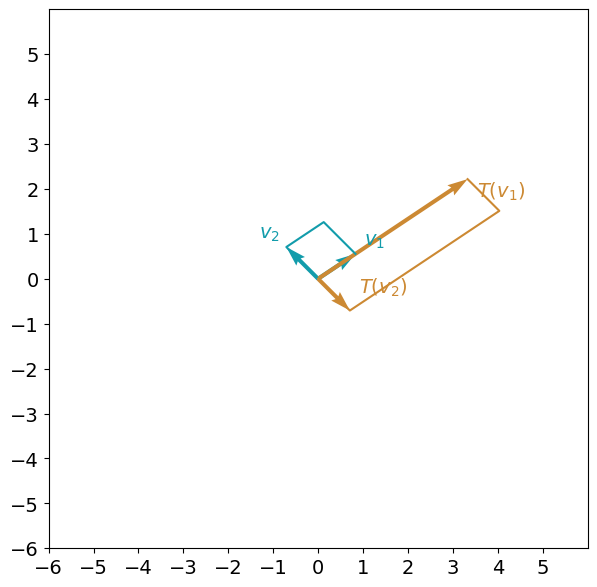

In [70]:
plot_transformation(A, A_eig[1][:,0], A_eig[1][:,1])

We can see that now that this linear transformation can be interpreted as a stretch in the direction of the eigenvector $v_1$ and change of the direction for the vector $v_2$.

<a name='2'></a>
## 2 - Eigenvalues and Eigenvectors of the Standard Transformations in a Plane


<a name='2.1'></a>
### 2.1 - Reflection about y-axis (the vertical axis)

<a name='ex01'></a>
### Reflection Transformation Analysis

In this analysis, we define the transformation matrix `A_reflection_yaxis` which corresponds to the reflection about y-axis, and compute its eigenvalues and eigenvectors. We visualize the result to observe how this linear transformation behaves in terms of the eigenvectors and their eigenvalues.

Matrix A_reflection_yaxis:
 [[-1  0]
 [ 0  1]] 

 Eigenvalues and eigenvectors of matrix A_reflection_yaxis:
 EigResult(eigenvalues=array([-1.,  1.]), eigenvectors=array([[1., 0.],
       [0., 1.]]))


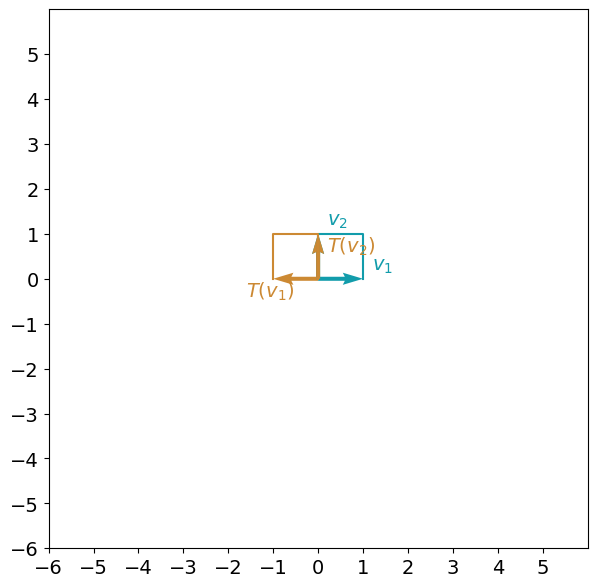

In [71]:


# Define transformation matrix A_reflection_yaxis as a numpy array.
A_reflection_yaxis = np.array([[-1,0],[0,1]])
# Find eigenvalues and eigenvectors or matrix A_reflection_yaxis.
A_reflection_yaxis_eig = np.linalg.eig(A_reflection_yaxis)

print("Matrix A_reflection_yaxis:\n", A_reflection_yaxis, 
      "\n\n Eigenvalues and eigenvectors of matrix A_reflection_yaxis:\n", A_reflection_yaxis_eig)
plot_transformation(A_reflection_yaxis, A_reflection_yaxis_eig[1][:,0], A_reflection_yaxis_eig[1][:,1])

It would be a natural question to ask, is it always possible to find two different eigenvectors for any linear transformation in $\mathbb{R}^2$? Well, unfortunately not. We can see the following example.

<a name='2.2'></a>
### 2.2 - Shear in x-direction

<a name='ex02'></a>
### Shear Transformation Analysis

The matrix `A_shear_x` corresponds to the shear in x-direction with a scalar $0.5$. It can be visualized as: 

<img src = "./images/shear_transformation.png" width="400" align="center"/>

In this transformation, vector $e_1=\begin{bmatrix}1 \\ 0\end{bmatrix}$ remains the same, while vector $e_2=\begin{bmatrix}0 \\ 1\end{bmatrix}$ transforms into $\begin{bmatrix}0.5 \\ 1\end{bmatrix}$. Let's compute the eigenvalues and eigenvectors of this matrix and visualize the transformation.

Matrix A_shear_x:
 [[1.  0.5]
 [0.  1. ]] 

 Eigenvalues and eigenvectors of matrix A_shear_x:
 EigResult(eigenvalues=array([1., 1.]), eigenvectors=array([[ 1.0000000e+00, -1.0000000e+00],
       [ 0.0000000e+00,  4.4408921e-16]]))


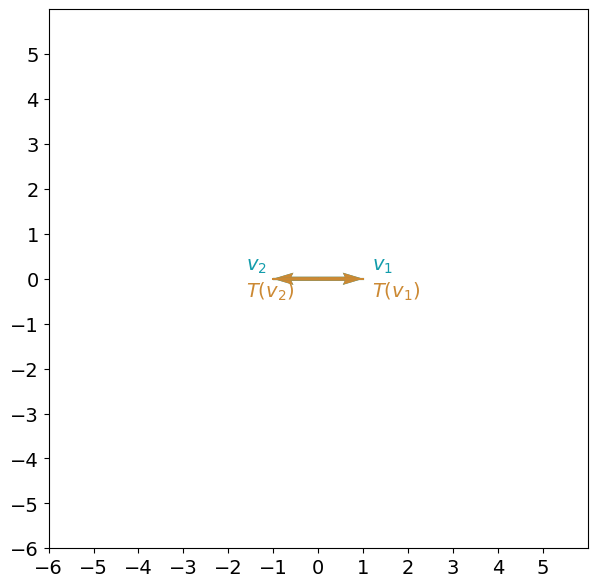

In [72]:
# Define transformation matrix for shear in x-direction
A_shear_x = np.array([[1, 0.5],[0, 1]])
# Find eigenvalues and eigenvectors of matrix A_shear_x
A_shear_x_eig = np.linalg.eig(A_shear_x)

print("Matrix A_shear_x:\n", A_shear_x, 
      "\n\n Eigenvalues and eigenvectors of matrix A_shear_x:\n", A_shear_x_eig)
plot_transformation(A_shear_x, A_shear_x_eig[1][:,0], A_shear_x_eig[1][:,1])

<a name='2.3'></a>
### 2.3 - Rotation

Rotation by $90$ degrees clockwise can be defined by matrix $A_{rotation}=\begin{bmatrix}0 & 1 \\ -1 & 0 \end{bmatrix}$. Let's find its eigenvalues and eigenvectors:

In [73]:
A_rotation = np.array([[0, 1],[-1, 0]])
A_rotation_eig = np.linalg.eig(A_rotation)

print("Matrix A_rotation:\n", A_rotation, 
      "\n\n Eigenvalues and eigenvectors of matrix A_rotation:\n", A_rotation_eig)

Matrix A_rotation:
 [[ 0  1]
 [-1  0]] 

 Eigenvalues and eigenvectors of matrix A_rotation:
 EigResult(eigenvalues=array([0.+1.j, 0.-1.j]), eigenvectors=array([[0.70710678+0.j        , 0.70710678-0.j        ],
       [0.        +0.70710678j, 0.        -0.70710678j]]))


There are two eigenvalues in the output, but they are actually complex numbers. So, there are no *real* eigenvalues ($\lambda\notin\mathbb{R}$), which means there will be no vectors that will keep their direction with this transformation. This makes sense for the rotation 90 degress, doesn't it?

<a name='2.4'></a>
### 2.4 - Identity Matrix and Scaling in All Directions

Let's investigate some other cases. What if we take the identity matrix? This means that there will be no change to any vector in the plane - all of the vectors can be considered as eigenvectors.

In [74]:
A_identity = np.array([[1, 0],[0, 1]])
A_identity_eig = np.linalg.eig(A_identity)

print("Matrix A_identity:\n", A_identity, 
      "\n\n Eigenvalues and eigenvectors of matrix A_identity:\n", A_identity_eig)

Matrix A_identity:
 [[1 0]
 [0 1]] 

 Eigenvalues and eigenvectors of matrix A_identity:
 EigResult(eigenvalues=array([1., 1.]), eigenvectors=array([[1., 0.],
       [0., 1.]]))


The output of the `np.linalg.eig()` function shows that there are two eigenvalues that are equal to each other $\lambda = 1$, which is true. But the list of eigenvectors does not cover all of them. It can be shown algebraically that all of the vectors will be eigenvectors for identity matrix. Using software, we can't always see the complete picture - this highlights why understanding the mathematical objects behind our codes and models is so important.

Let's verify that the same behavior occurs when finding eigenvectors for the scaling (dilation) in both directions x and y by factor $2$:

In [75]:
A_scaling = np.array([[2, 0],[0, 2]])
A_scaling_eig = np.linalg.eig(A_scaling)

print("Matrix A_scaling:\n", A_scaling, 
      "\n\n Eigenvalues and eigenvectors of matrix A_scaling:\n", A_scaling_eig)

Matrix A_scaling:
 [[2 0]
 [0 2]] 

 Eigenvalues and eigenvectors of matrix A_scaling:
 EigResult(eigenvalues=array([2., 2.]), eigenvectors=array([[1., 0.],
       [0., 1.]]))


<a name='2.5'></a>
### 2.5 - Projection onto x-axis

Let's investigate a more interesting case: projection onto x-axis. The matrix $A_{projection}=\begin{bmatrix}1 & 0 \\ 0 & 0 \end{bmatrix}$ has two real eigenvalues, and one of them is equal to $0$. There is nothing wrong with this - $\lambda$ can be equal to $0$! The transformation still has two eigenvectors.

In [76]:
A_projection = np.array([[1, 0],[0, 0]])
A_projection_eig = np.linalg.eig(A_projection)

print("Matrix A_projection:\n", A_projection, 
      "\n\n Eigenvalues and eigenvectors of matrix A_projection:\n", A_projection_eig)

Matrix A_projection:
 [[1 0]
 [0 0]] 

 Eigenvalues and eigenvectors of matrix A_projection:
 EigResult(eigenvalues=array([1., 0.]), eigenvectors=array([[1., 0.],
       [0., 1.]]))


Having explored how to find eigenvalues and eigenvectors, let's examine one of their practical applications.

<a name='3'></a>
## 3 - Application of Eigenvalues and Eigenvectors: Navigating Webpages

Multiple components describing some structure can be organized as a single vector. If the state of the structure is changing in time due to some process, the vector is referred as a **state vector**. Such dynamic processes are often modeled at discrete times calculating the state vector as a linear transformation of a previous state vector. This model is called a **discrete dynamical system**. 

Starting with an initial state $X_0$, the transition to the next state $X_1$ is a linear transformation defined with a matrix $P$: $X_1=PX_0$. That leads to $X_2=PX_1=P^2X_0$, $X_3=P^3X_0$, and so on. This implies that $X_t=PX_{t-1}$ for $t=0,1,2,3,\ldots$.

A discrete dynamical system can be used to model browsing web pages. Web pages often contain links to other pages, for simplicity assume that the browser is only following links to a new page rather than navigating to an unlinked one. 

Let the probabilities that the browser is on a particular page at time $t$ be a state vector $X_t$. Navigation from one page to another advances the model from one state vector $X_{t-1}$ to another state vector $X_t$. A linear transformation, defined by a matrix $P$, will have entries $a_{ij}$ with the probabilities that the browser navigates to page $i$ from page $j$. For fixed column $j$, the entries represent a probability distribution describing location of the browser at the next step. Thus, the entries in each column must add to one.

<a name='ex03'></a>
### Web Navigation Model Setup

We construct a transition probability matrix $P$ for a small number of pages $n=5$. All elements on the main diagonal are equal to $0$, and the entries in each column add to one, making this a proper stochastic matrix. For reference, here is an example of such a matrix for $n=4$:

$$P=
\begin{bmatrix}
0 & 0.75 & 0.35 & 0.85 \\
0.15 & 0 & 0.35 & 0.05 \\
0.30 & 0.20 & 0 & 0.1 \\
0.55 & 0.05 & 0.30 & 0
\end{bmatrix}\tag{5}
$$

We define the initial state vector $X_0$ such that the browser starts navigation at page $4$ ($X_0$ is a vector with a single entry equal to one, and all other entries equal to zero). By applying the transformation once as $X_1=PX_0$, we can determine the probability distribution of the browser being at each of the five pages after one step.

In [77]:
# Define the transition probability matrix P for 5 pages
P = np.array([    
    [0, 0.75, 0.35, 0.25, 0.85],
    [0.15, 0, 0.35, 0.25, 0.05],
    [0.15, 0.15, 0, 0.25, 0.05],
    [0.15, 0.05, 0.05, 0, 0.05],
    [0.55, 0.05, 0.25, 0.25, 0]
]) 
# Initial state: browser starts at page 4
X0 = np.array([[0], [0], [0], [1], [0]])
# Apply the transformation to get the probability distribution after one step
X1 = np.matmul(P, X0)
print("Column sums (should all be 1.0):", sum(P))

Column sums (should all be 1.0): [1. 1. 1. 1. 1.]


##### __Expected Output__

```Python
[1. 1. 1. 1. 1.]
```

It is interesting to predict the probabilities in $X_m$ when $m$ is large, and thus determining what pages a browser is more likely to visit after this sort of random navigation. To do that, we would need to apply the transformation many times, and in real-world problems this can be computationally expensive. Eigenvalues and eigenvectors can help here by significantly reducing the amount of calculations. 

Let's find eigenvalues and eigenvectors for the previously defined matrix $P$:

In [78]:
np.linalg.eig(P)

EigResult(eigenvalues=array([ 1.        , -0.70367062,  0.00539505, -0.08267227, -0.21905217]), eigenvectors=array([[-0.76088562, -0.81362074,  0.10935376,  0.14270615, -0.39408574],
       [-0.25879453,  0.050269  , -0.6653158 ,  0.67528802, -0.66465044],
       [-0.2204546 ,  0.07869601, -0.29090665,  0.17007443,  0.35048734],
       [-0.1644783 ,  0.12446953,  0.19740707, -0.43678067,  0.23311487],
       [-0.52766004,  0.56018621,  0.64946163, -0.55128793,  0.47513398]]))

A square matrix is called a **Markov matrix** if all entries are nonnegative and the sum of each column elements is equal to $1$. Markov matrices have a handy property - they always have an eigenvalue equal to 1. 

Matrix $P$ was defined in such a way that it is actually a Markov matrix, and we can see that it has an eigenvalue $1$. The equation $X_m=PX_{m-1}$ can be rewritten as $PX_{m-1}=1\times X_m$. When predicting probabilities in $X_m$ for large $m$, we can look for an eigenvector corresponding to the eigenvalue $1$, because then we will get $PX = X$.

In [79]:
X_inf = np.linalg.eig(P)[1][:,0]

print("Eigenvector corresponding to the eigenvalue 1:\n" + str(X_inf))

Eigenvector corresponding to the eigenvalue 1:
[-0.76088562 -0.25879453 -0.2204546  -0.1644783  -0.52766004]


<a name='ex04'></a>
### Eigenvector Verification

Let's verify our eigenvector by performing the matrix multiplication $PX$ (multiplying matrix `P` and vector `X_inf`) to confirm that the result equals the vector $X$ (`X_inf`).

In [80]:
def check_eigenvector(P, X_inf):
    """Verify that X_inf is an eigenvector by checking PX = X"""
    X_check = np.matmul(P, X_inf)
    return X_check

X_check = check_eigenvector(P, X_inf)

print("Original eigenvector corresponding to the eigenvalue 1:\n" + str(X_inf))
print("Result of multiplication:" + str(X_check))

# Function np.isclose compares two NumPy arrays element by element, allowing for error tolerance (rtol parameter).
print("Check that PX=X element by element:" +str(np.isclose(X_inf, X_check, rtol=1e-10)))

Original eigenvector corresponding to the eigenvalue 1:
[-0.76088562 -0.25879453 -0.2204546  -0.1644783  -0.52766004]
Result of multiplication:[-0.76088562 -0.25879453 -0.2204546  -0.1644783  -0.52766004]
Check that PX=X element by element:[ True  True  True  True  True]


The output eigenvectors of the `np.linalg.eig()` function are normalized so that their norm is $1$. For the vector $X$, we need to choose a vector in the same direction such that the sum of its elements equals $1$:

In [81]:
X_inf = X_inf / sum(X_inf)

print("Probabilities being at each of the pages:\n" + str(X_inf))

Probabilities being at each of the pages:
[0.39377747 0.13393269 0.11409081 0.08512166 0.27307736]


## Generate Figures for LaTeX Document

In [82]:
import os

# Create figures directory if it doesn't exist
os.makedirs('figures', exist_ok=True)

def plot_and_save_transformation(T, v1, v2, filename):
    """Plot transformation and save to file"""
    color_original = "#129cab"
    color_transformed = "#cc8933"
    
    # Ensure v1 and v2 are column vectors (2D arrays)
    if v1.ndim == 1:
        v1 = v1.reshape(-1, 1)
    if v2.ndim == 1:
        v2 = v2.reshape(-1, 1)
    
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xticks(np.arange(-6, 6))
    ax.set_yticks(np.arange(-6, 6))
    
    plt.axis([-6, 6, -6, 6])
    plt.quiver([0, 0],[0, 0], [v1[0,0], v2[0,0]], [v1[1,0], v2[1,0]], color=color_original, angles='xy', scale_units='xy', scale=1)
    plt.plot([0,v2[0,0],v1[0,0]+v2[0,0],v1[0,0]], 
        [0,v2[1,0],v1[1,0]+v2[1,0],v1[1,0]], 
        color=color_original)
    v1_sgn = 0.4 * np.array([[1 if v1[i,0]==0 else np.sign(v1[i,0])] for i in range(len(v1))])
    ax.text(v1[0,0]-0.2+v1_sgn[0,0], v1[1,0]-0.2+v1_sgn[1,0], f'$v_1$', fontsize=14, color=color_original)
    v2_sgn = 0.4 * np.array([[1 if v2[i,0]==0 else np.sign(v2[i,0])] for i in range(len(v2))])
    ax.text(v2[0,0]-0.2+v2_sgn[0,0], v2[1,0]-0.2+v2_sgn[1,0], f'$v_2$', fontsize=14, color=color_original)
    
    v1_transformed = T @ v1
    v2_transformed = T @ v2
    
    plt.quiver([0, 0],[0, 0], [v1_transformed[0,0], v2_transformed[0,0]], [v1_transformed[1,0], v2_transformed[1,0]], 
               color=color_transformed, angles='xy', scale_units='xy', scale=1)
    plt.plot([0,v2_transformed[0,0],v1_transformed[0,0]+v2_transformed[0,0],v1_transformed[0,0]], 
             [0,v2_transformed[1,0],v1_transformed[1,0]+v2_transformed[1,0],v1_transformed[1,0]], 
             color=color_transformed)
    v1_transformed_sgn = 0.4 * np.array([[1 if v1_transformed[i,0]==0 else np.sign(v1_transformed[i,0])] for i in range(len(v1_transformed))])
    ax.text(v1_transformed[0,0]-0.2+v1_transformed_sgn[0,0], v1_transformed[1,0]-v1_transformed_sgn[1,0], 
            f'$T(v_1)$', fontsize=14, color=color_transformed)
    v2_transformed_sgn = 0.4 * np.array([[1 if v2_transformed[i,0]==0 else np.sign(v2_transformed[i,0])] for i in range(len(v2_transformed))])
    ax.text(v2_transformed[0,0]-0.2+v2_transformed_sgn[0,0], v2_transformed[1,0]-v2_transformed_sgn[1,0], 
            f'$T(v_2)$', fontsize=14, color=color_transformed)
    
    plt.gca().set_aspect("equal")
    plt.grid(True, alpha=0.3)
    plt.savefig(f'figures/{filename}', dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Saved: figures/{filename}")

# Generate all figures
print("Generating figures for LaTeX document...")

Generating figures for LaTeX document...


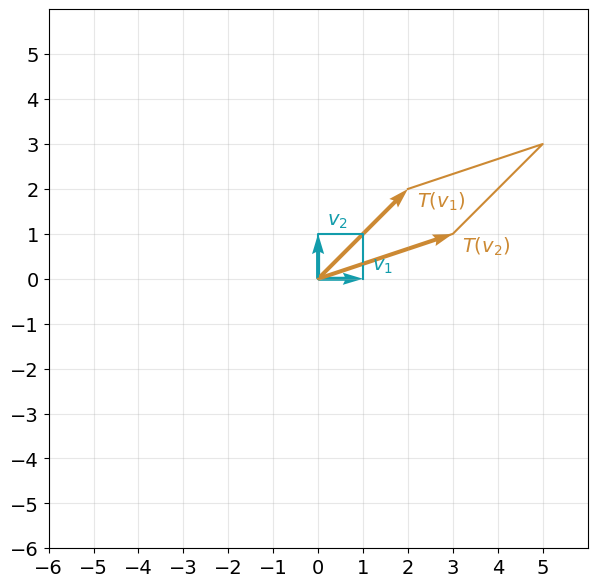

Saved: figures/basic_transformation.png


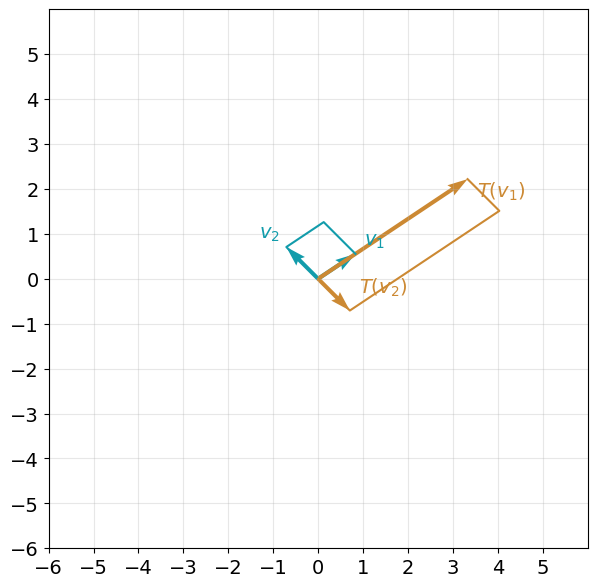

Saved: figures/eigenvector_transformation.png


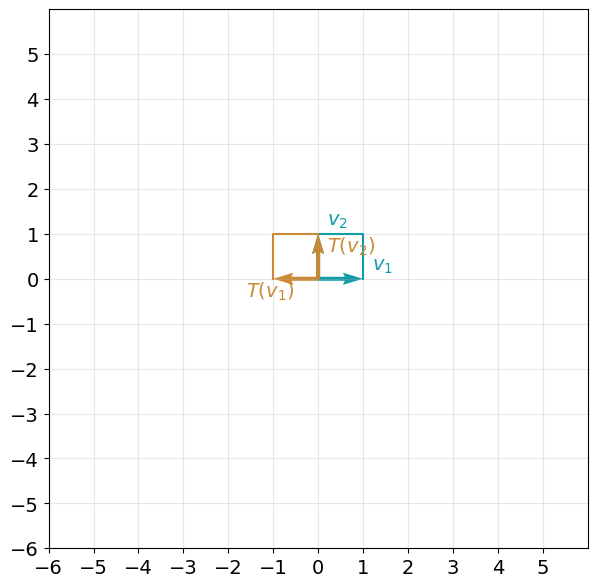

Saved: figures/reflection_transformation.png


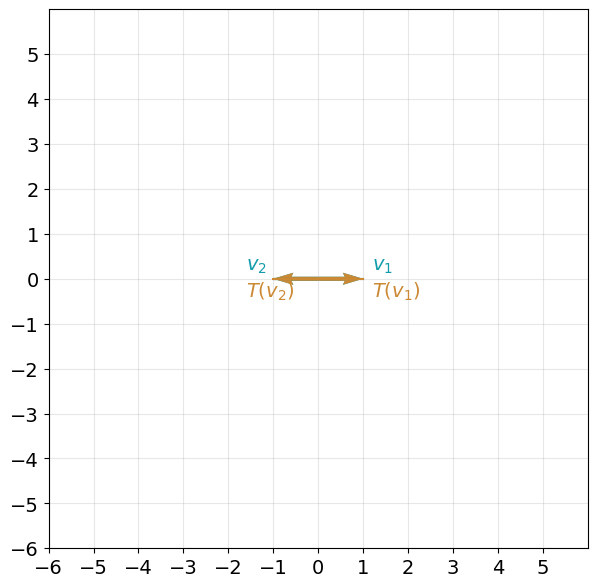

Saved: figures/shear_transformation.png

All figures saved successfully!


In [83]:
# 1. Basic transformation with standard basis
plot_and_save_transformation(A, e1, e2, 'basic_transformation.png')

# 2. Transformation with eigenvectors
plot_and_save_transformation(A, A_eig[1][:,0], A_eig[1][:,1], 'eigenvector_transformation.png')

# 3. Reflection about y-axis
plot_and_save_transformation(A_reflection_yaxis, A_reflection_yaxis_eig[1][:,0], A_reflection_yaxis_eig[1][:,1], 'reflection_transformation.png')

# 4. Shear in x-direction
plot_and_save_transformation(A_shear_x, A_shear_x_eig[1][:,0], A_shear_x_eig[1][:,1], 'shear_transformation.png')

print("\nAll figures saved successfully!")